In [115]:
import pandas as pd
from matplotlib import pyplot as plt

In [116]:
df = pd.read_csv('data/insurance_data.csv')
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


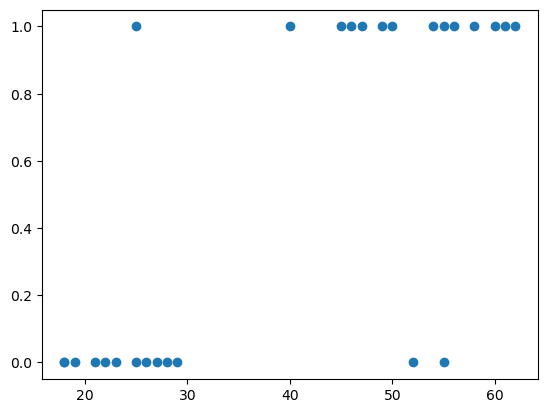

In [117]:
plt.scatter(df['age'], df['bought_insurance'])

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df[['age']], df['bought_insurance'], test_size=0.1)

In [120]:
Xtrain

,age
1,25
2,47
11,28
23,45
16,25
24,50
3,52
26,23
22,40
19,18


In [121]:
Xtest

,age
14,49
25,54
17,58


In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
model = LogisticRegression()

model.fit(Xtrain, ytrain)

LogisticRegression()

In [124]:
model.predict(Xtest)

array([1, 1, 1], dtype=int64)

In [125]:
# Accuracy of the Model..
model.score(Xtest, ytest)

1.0

In [126]:
# Probablity distribution across the classes
model.predict_proba(Xtest)

array([[0.243831  , 0.756169  ],
       [0.14718313, 0.85281687],
       [0.09475341, 0.90524659]])

# Excercise 

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [127]:
data = pd.read_csv('data/HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [128]:
# Seems like promotion (5 yrs), Satisfaction, Salary. Department, time spent in company has a direct impact on leaving..

# Major factor affecting the binary classification target
data.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<BarContainer object of 3 artists>

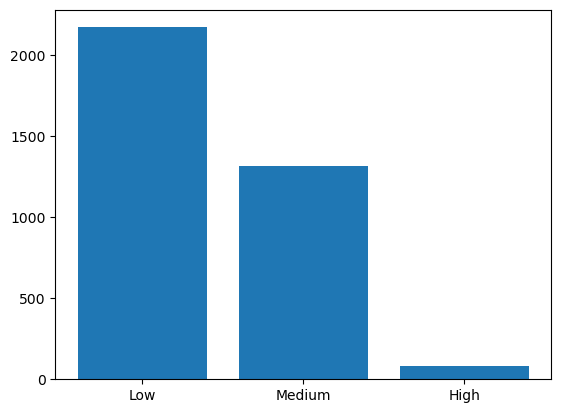

In [129]:
low_sal_left = 0
med_sal_left = 0
high_sal_left = 0

for sal, left in zip(data['salary'], data['left']):
    if sal == 'low' and left == 1:
        low_sal_left += 1
        
    elif sal == 'medium' and left == 1:
        med_sal_left += 1
    
    elif sal == 'high' and left == 1:
        high_sal_left += 1

sal_list = [low_sal_left, med_sal_left, high_sal_left]
sal_type = ['Low', 'Medium', 'High']

plt.bar(sal_type, sal_list)

<Axes: xlabel='salary'>

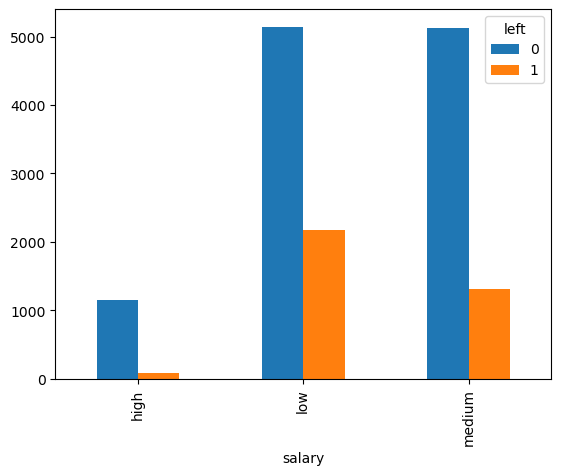

In [130]:
# Easier way to visualize catergorical data, here y-axis is the categorical data we intend to plot.
pd.crosstab(data.salary,data.left).plot(kind='bar')

In [131]:
dept_left = {}

for dept, left in zip(data['Department'], data['left']):
    if dept not in dept_left:
        dept_left[dept] = left
    else:
        dept_left[dept] += left

# print(dept_left)

dept_list = []
left_list = []

for k, v in dept_left.items():
    dept_list.append(k)
    left_list.append(v)

print(dept_list, left_list)

['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD'] [1014, 204, 215, 697, 555, 91, 273, 198, 203, 121]


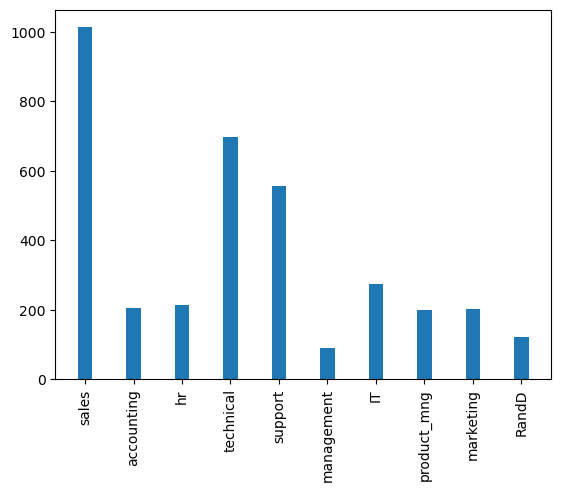

In [132]:
plt.bar(dept_list, left_list, width=0.3)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Department'>

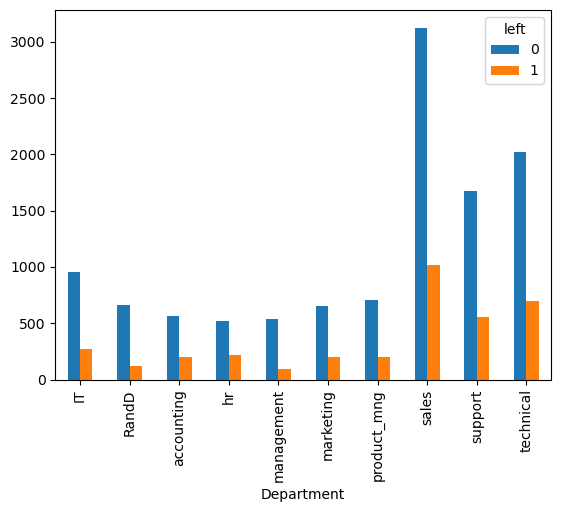

In [133]:
# Easier way to visualize catergorical data, here y-axis is the categorical data we intend to plot.
pd.crosstab(data.Department,data.left).plot(kind='bar')

In [134]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [135]:
# Encoding data so that we can input into our model
from sklearn.preprocessing import LabelEncoder

le_dept = LabelEncoder()
le_dept.fit(data['Department'])
data['Department'] = le_dept.transform(data['Department'])

le_sal = LabelEncoder()
le_sal.fit(data['salary'])
data['salary'] = le_sal.transform(data['salary'])

data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [136]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data[['satisfaction_level', 'average_montly_hours', 'Work_accident', 'promotion_last_5years', 'salary']], data['left'], test_size=0.2)

model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [137]:
model.score(Xtest, ytest)

0.7813333333333333